# Create expanding rings of probability as a numpy cube 
### for use in an iterated conditional probability cellular automoton 

Claude.ai wrote this from the following prompt: "Could you please write me a python code that makes a space-time 3D numpy array with concentric expanding waves similar to a rock thrown in a pond? There should be inputs for the size of the array (NX and NY points), the number of time steps NT, the wavelength (in pixel units), and speed of the waves (in wavelengths per time step)." It offered to add animation, so why not? What an era. 

The decay rate with distance and time are ad hoc as you see. 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_wave_simulation(NX, NY, NT, wavelength, wave_speed):
    """
    Create a 3D numpy array representing expanding concentric waves.
    
    Parameters:
    -----------
    NX : int
        Number of points in x direction
    NY : int
        Number of points in y direction
    NT : int
        Number of time steps
    wavelength : float
        Wavelength of the waves in pixel units
    wave_speed : float
        Speed of waves in wavelengths per time step
    
    Returns:
    --------
    numpy.ndarray
        3D array of shape (NT, NY, NX) containing the wave simulation
    """
    # Create coordinate grids
    x = np.linspace(-NX/2, NX/2, NX)
    y = np.linspace(-NY/2, NY/2, NY)
    X, Y = np.meshgrid(x, y)
    
    # Initialize the output array
    waves = np.zeros((NT, NY, NX))
    
    # Calculate the wave number (k = 2π/λ)
    k = 2 * np.pi / wavelength
    
    # Calculate the angular frequency (ω = v * k)
    omega = wave_speed * k
    
    # Calculate distance from center for each point
    R = np.sqrt(X**2 + Y**2)
    
    # Create the wave pattern for each time step
    for t in range(NT):
        # Calculate the wave amplitude at each point and time
        # Using a decaying amplitude with distance to make it more realistic
        decay = 1 / (1 + 0.1 * R)  # Decay factor
        # decay = 1  # No decay 
        waves[t] = np.sin(k * R - omega * t) * decay
        
        # Set all points beyond the initial wave front to zero
        wave_front = wave_speed * t
        waves[t] *= (R <= wave_front)
    
    return waves

def animate_waves(waves, interval=50):
    """
    Create an animation of the wave simulation.
    
    Parameters:
    -----------
    waves : numpy.ndarray
        3D array of wave data (NT, NY, NX)
    interval : int
        Time interval between frames in milliseconds
    
    Returns:
    --------
    matplotlib.animation.Animation
        Animation object that can be displayed
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Find the maximum amplitude for consistent color scaling
    vmax = np.max(np.abs(waves))
    vmin = -vmax
    
    # Initialize the plot with the first frame
    im = ax.imshow(waves[0], cmap='RdBu_r', vmin=vmin, vmax=vmax)
    plt.colorbar(im, label='Amplitude')
    
    # Update function for animation
    def update(frame):
        im.set_array(waves[frame])
        ax.set_title(f'Time step: {frame}')
        return [im]
    
    # Create the animation
    anim = FuncAnimation(fig, update, frames=len(waves),
                        interval=interval, blit=True)
    plt.close()
    return anim

In [38]:
    NX, NY = 100, 100  # Spatial dimensions
    NT = 50            # Number of time steps
    wavelength = 20    # Wavelength in pixels
    wave_speed = 0.5   # Speed in wavelengths per time step
    
    # Create the wave simulation
    waves = create_wave_simulation(NX, NY, NT, wavelength, wave_speed)
    
    # Create and display the animation
    anim = animate_waves(waves)
    
    # If running in Jupyter notebook:
    HTML(anim.to_jshtml())

In [49]:
    NX, NY = 21, 21  # Spatial dimensions
    NT = 8            # Number of time steps
    wavelength = 15    # Wavelength in pixels
    wave_speed = 2   # Speed in wavelengths per time step
    
    # Create the wave simulation, negate it, for kernel like satellite result 
    waves = -create_wave_simulation(NX, NY, NT, wavelength, wave_speed)

    # Subtract the mean at each time 
    #for it in range(NT): 
    #    waves[it,:,:] -= np.mean(waves[it,:,:])

    # Create and display the animation, discarding the first 3 time steps
    anim = animate_waves(waves[3:,:,:])
    
    # If running in Jupyter notebook:
    HTML(anim.to_jshtml())

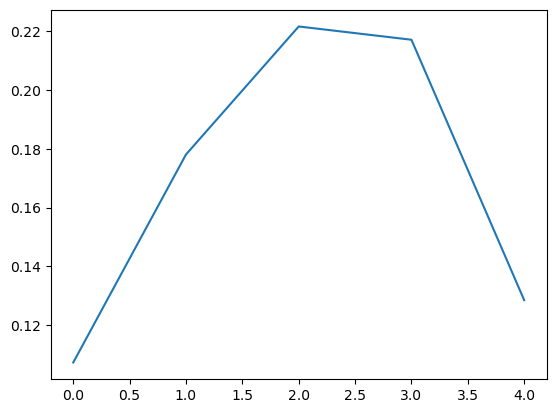

In [50]:
# Mean value is largely positive, as in satllite data 
plt.plot( np.mean(np.mean(waves[3:,:,:],2),1) )

In [51]:
# Save this as a kernel for the CA 

pcond = waves[3:,:,:]
np.save('pkernel_21x21x5.numpy', pcond)